In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn")
colors = sns.color_palette("muted", 10)

import missingno as msno
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
df = pd.read_csv('/data2/dlstj/dacon_carvideo_classification/train.csv')
print(df['video_path'][:2])
df['video_path'] = df['video_path'].replace(to_replace='./train', value='/data2/dlstj/dacon_carvideo_classification/train', regex=True)
print(df['video_path'][:2])

df.head()

0    ./train/TRAIN_0000.mp4
1    ./train/TRAIN_0001.mp4
Name: video_path, dtype: object
0    /data2/dlstj/dacon_carvideo_classification/tra...
1    /data2/dlstj/dacon_carvideo_classification/tra...
Name: video_path, dtype: object


,sample_id,video_path,label
0,TRAIN_0000,/data2/dlstj/dacon_carvideo_classification/tra...,7
1,TRAIN_0001,/data2/dlstj/dacon_carvideo_classification/tra...,7
2,TRAIN_0002,/data2/dlstj/dacon_carvideo_classification/tra...,0
3,TRAIN_0003,/data2/dlstj/dacon_carvideo_classification/tra...,0
4,TRAIN_0004,/data2/dlstj/dacon_carvideo_classification/tra...,1


#### 결측치 확인

<AxesSubplot:>

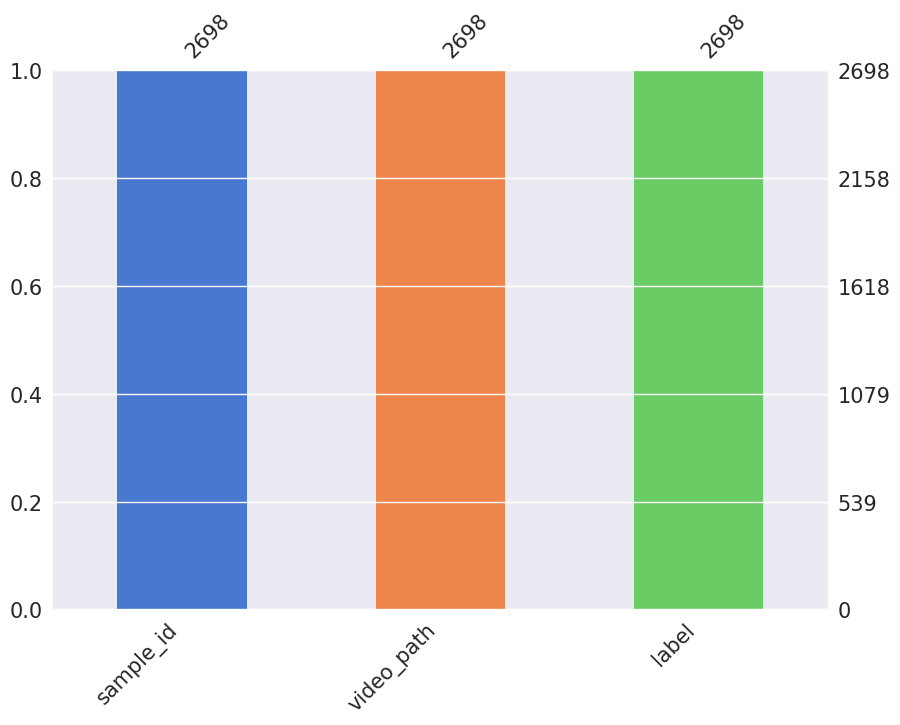

In [6]:
msno.bar(df, figsize=(10,7), fontsize=15, color=colors)

#### 라벨(13개) 당 데이터 개수 확인

In [7]:
df["label"].value_counts(dropna=False).sort_index()

0     1783
1      318
2       51
3       78
4       13
5       28
6        3
7      317
8       30
9       34
10       4
11      33
12       6
Name: label, dtype: int64

#### 3개의 label로 나눈 후 데이터 개수 확인

In [8]:
info_to_label = {'100':1,'101':2,'110':3,'111':4,'120':5,'121':6,'200':7,'201':8,'210':9,'211':10,'220':11,'221':12}
label_to_info = {1:'100',2:'101',3:'110',4:'111',5:'120',6:'121',7:'200',8:'201',9:'210',10:'211',11:'220',12:'221'}

def get_label_info(label):
    if label == 0:
        crash_ego_label, weather_label, timing_label = 0, np.NaN, np.NaN
    else:
        infos = list(map(int, list(label_to_info[label])))
        crash_ego_label, weather_label, timing_label = infos[0], infos[1], infos[2]
    return crash_ego_label, weather_label, timing_label

df = pd.read_csv('/data2/dlstj/dacon_carvideo_classification/train.csv')
df['video_path'] = df['video_path'].replace(to_replace='./train', value='/data2/dlstj/dacon_carvideo_classification/train', regex=True)

crash_ego_label = []
weather_label = []
timing_label = []
for label in df['label']:
    res1, res2, res3 = get_label_info(label)
    crash_ego_label.append(res1)
    weather_label.append(res2)
    timing_label.append(res3)
    
df['crash_ego_labels'] = crash_ego_label
df['weather_labels'] = weather_label
df['timing_labels'] = timing_label

df

,sample_id,video_path,label,crash_ego_labels,weather_labels,timing_labels
0,TRAIN_0000,/data2/dlstj/dacon_carvideo_classification/tra...,7,2,0.0,0.0
1,TRAIN_0001,/data2/dlstj/dacon_carvideo_classification/tra...,7,2,0.0,0.0
2,TRAIN_0002,/data2/dlstj/dacon_carvideo_classification/tra...,0,0,NaN,NaN
3,TRAIN_0003,/data2/dlstj/dacon_carvideo_classification/tra...,0,0,NaN,NaN
4,TRAIN_0004,/data2/dlstj/dacon_carvideo_classification/tra...,1,1,0.0,0.0
...,...,...,...,...,...,...
2693,TRAIN_2693,/data2/dlstj/dacon_carvideo_classification/tra...,3,1,1.0,0.0
2694,TRAIN_2694,/data2/dlstj/dacon_carvideo_classification/tra...,5,1,2.0,0.0
2695,TRAIN_2695,/data2/dlstj/dacon_carvideo_classification/tra...,0,0,NaN,NaN
2696,TRAIN_2696,/data2/dlstj/dacon_carvideo_classification/tra...,0,0,NaN,NaN


In [10]:
df["crash_ego_labels"].value_counts(dropna=False).sort_index()

0    1783
1     491
2     424
Name: crash_ego_labels, dtype: int64

In [11]:
df["weather_labels"].value_counts(dropna=False).sort_index()

0.0     716
1.0     129
2.0      70
NaN    1783
Name: weather_labels, dtype: int64

In [13]:
df["timing_labels"].value_counts(dropna=False).sort_index()

0.0     808
1.0     107
NaN    1783
Name: timing_labels, dtype: int64